# Proszę zaimplementować rekurencyjną LU faktoryzację bazując na swoim rekurencyjnym mnożeniu i odwracaniu macierzy


In [22]:
import random


### Tworzenie macierzy

In [23]:
def createMatrix(size):
    matrix = []
    for i in range(size):
        matrix.append([])
        for j in range(size):
            matrix[i].append(random.uniform(0, 1))
    return matrix

### Wyświetlenie macierzy

In [24]:
def printMatrix(matrix):
    for row in matrix:
        print(row)

In [25]:
matrix1 = createMatrix(4)
printMatrix(matrix1)

[0.961468115178371, 0.5238109268488109, 0.17017830939202894, 0.47288797230362833]
[0.33529215277442315, 0.1579825234684049, 0.06425204202236356, 0.3750782939796665]
[0.8967424006840895, 0.8988568313124069, 0.13472553402587195, 0.8023583272239005]
[0.8456193534888167, 0.864703784373158, 0.619238837367686, 0.7137003914891555]


## LU faktoryzacja metodą Doolitle'a

In [26]:
from LU_factorization import doolittleLUFactorization, doolittleLUFactorizationWithOperationCounting

## Blokowa LU factoryzacja - pseudokod albo wzór

In [27]:
from LU_factorization import LUBlockFactorization, LUBlockFactorizationWithOperationCounting


## Porównanie metod faktoryzacji

In [28]:
L, U = doolittleLUFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[0.3487293519995927, 1.0, 0.0, 0.0]
[0.9326803318045823, -16.621295846275856, 1.0, 0.0]
[0.8795084726568783, -16.36604521138135, 9.555139939681014, 1.0]



[0.961468115178371, 0.5238109268488109, 0.17017830939202894, 0.47288797230362833]
[0.0, -0.02468572162188698, 0.00490587046369511, 0.21016837782982087]
[0.0, 0.0, 0.057545496316754485, 3.854575801750693]
[0.0, 0.0, 0.0, -33.093594607039904]


In [29]:
L, U = LUBlockFactorization(matrix1)
printMatrix(L)
print('\n\n')
printMatrix(U)

[1.0, 0.0, 0.0, 0.0]
[0.3487293519995927, 1.0, 0.0, 0.0]
[0.9326803318045823, -16.621295846275856, 1.0, 0.0]
[0.8795084726568783, -16.36604521138136, 9.555139939681014, 1.0]



[0.961468115178371, 0.5238109268488109, 0.17017830939202894, 0.47288797230362833]
[0.0, -0.02468572162188698, 0.00490587046369511, 0.21016837782982087]
[0.0, 0.0, 0.057545496316754485, 3.854575801750693]
[0.0, 0.0, 0.0, -33.093594607039904]


## Test poprawności metod

In [30]:
from multiplication import hybridMultiplication, sub

In [60]:
L1, U1 = doolittleLUFactorization(matrix1)
L2, U2 = LUBlockFactorization(matrix1)

dolittleError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L1, U1, 2**4))])
blockError = sum([sum(row) for row in sub(matrix1, hybridMultiplication(L2, U2, 2**4))])

print(dolittleError)
print(blockError)

3.885780586188048e-16
1.6653345369377348e-16


## TODO Wartości własne i wyznacznik

In [12]:
from LU_factorization import getEigenValues, calculateDeterminant

In [15]:
print(getEigenValues(U1))
print(calculateDeterminant(U1))

[0.8468513429191376, 0.3826706203448009, -0.9318417131246695, 0.753715893132627]
-0.22760516930750074


In [16]:
print(getEigenValues(U2))
print(calculateDeterminant(U2))

[0.8468513429191376, 0.3826706203448009, -0.931841713124669, 0.7537158931326271]
-0.2276051693075007


In [91]:
matrices = [createMatrix(2**x) for x in range(1,10)]
sizes = [x for x in range(1,10)]

## TODO Testy czasowe

In [87]:
import timeit
def calculateRunningTime(L,U,matrix):
    start = timeit.default_timer()
    hybridMultiplication(L, U, 2**len(matrix))
    stop = timeit.default_timer()
    return (stop - start)


In [97]:
matrixTimes1 = []
matrixTimes2 = []

for matrix in matrices:
    L1, U1 = doolittleLUFactorization(matrix)
    L2, U2 = LUBlockFactorization(matrix)

    matrixTimes1.append(calculateRunningTime(L1, U1,matrix))
    matrixTimes2.append(calculateRunningTime(L2, U2, matrix))

In [100]:
print(matrixTimes1)
print('\n')
print(matrixTimes2)

[1.650000922381878e-05, 3.6499928683042526e-05, 0.00022780010476708412, 0.0013208999298512936, 0.0035838999319821596, 0.02633580006659031, 0.2133158000651747, 1.8778957999311388, 17.797181899892166]


[1.1800089851021767e-05, 3.869994543492794e-05, 0.0002194000408053398, 0.0012564000207930803, 0.0036340001970529556, 0.02590889995917678, 0.20592520013451576, 1.8665472001302987, 15.437904100166634]


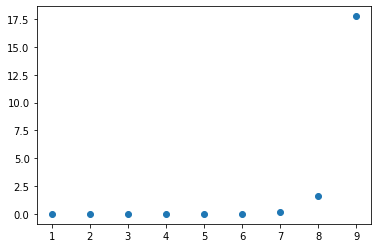

In [92]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixTimes1)
plt.show()

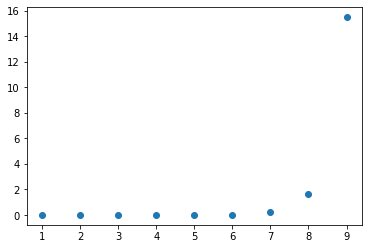

In [95]:
plt.scatter(sizes, matrixTimes2)
plt.show()

## TODO Ilość operacji

In [78]:
from multiplication import hybridMultiplicationWithOperationCounting, sub

matrixOperations1 = []
matrixOperations2 = []



for matrix in matrices:
    L1, U1 = doolittleLUFactorization(matrix)
    L2, U2 = LUBlockFactorization(matrix)

    matrixOperations1.append(hybridMultiplicationWithOperationCounting(L1, U1, 2**len(matrix))[1])
    matrixOperations2.append(hybridMultiplicationWithOperationCounting(L2, U2, 2**len(matrix))[1])


In [77]:
print(matrixOperations1)
print(matrixOperations2)

[16, 128, 1024, 8192, 65536, 524288, 4194304, 33554432, 268435456]
[16, 128, 1024, 8192, 65536, 524288, 4194304, 33554432, 268435456]


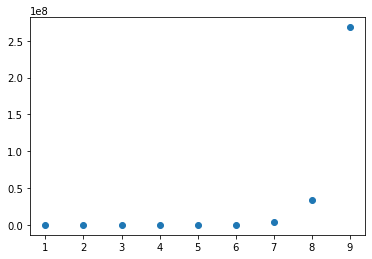

In [93]:
import matplotlib.pyplot as plt


plt.scatter(sizes, matrixOperations1)
plt.show()

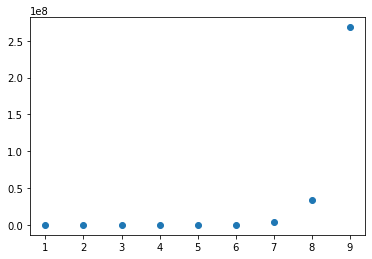

In [94]:
plt.scatter(sizes, matrixOperations2)
plt.show()